In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from read_funcs import*
import pandas as pd
import seaborn as sns

In [2]:
def getLogOut(file):
    i=0
    d_str = []
    with open (file) as myfile:
        for line in myfile:

            if "Loop time" in line:
                i=0
            if i==1:
                d_str.append(line)
            if "Step Temp Press" in line:
                i=1
                
    return np.loadtxt(np.array(d_str))

In [46]:
KA_logf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/biofilms/LAMMPS_ibm/local_sims/sim_files_KA/*.log')
KA_outa = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/biofilms/LAMMPS_ibm/local_sims/sim_files_KA/traj*.out')

In [99]:
l=glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/biofilms/LAMMPS_ibm/local_sims/sim_files_KA/traj*len_50*temp_0.5.out')[0]
tTot= len(getTimeArr(l))
cellNum = int(getAtomNumber(l))
atomArr = getLastCellArr(l,tTot,cellNum)

In [100]:
l

'/Users/nikhilkrishnan/Dropbox/Research/PhD/biofilms/LAMMPS_ibm/local_sims/sim_files_KA/traj_KA_01_22_21_10_22_10_thick_6_len_50_scale_0.6_rep_0_temp_0.5.out'

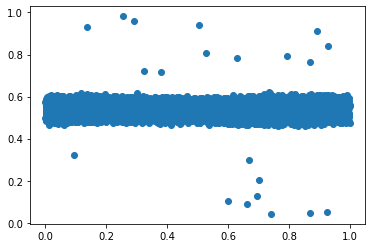

In [101]:
plt.scatter(atomArr[:,0],atomArr[:,1])


In [40]:

lengths = np.array([50,75,100,125,150,175,200,225,250])
temps = np.array([0.1,0.3,0.5])
stressArr = np.zeros((1,len(lengths),len(temps),142))
logFiles = ['KA','LJ']
for s in range(1):
    for l,length in enumerate(lengths):
        for t,temp in enumerate(temps):
            logs = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/biofilms/LAMMPS_ibm/local_sims/sim_files_'+logFiles[s]+'/*len_'+str(length)+'*temp_'+str(temp)+'.log')
            log = logs[0]
    #logFile=logFiles[t]
    #cnt=0
    
    #for l in logFile:
        

        #lenl =int(l.split('len_')[1].split('_')[0])
        #ci = np.argwhere(lenl==lengths)[0][0]
        #IDl =(int(l.split('rep_')[1].split('.')[0])+(100*(np.argwhere(thickl==thickness)[0][0])))%100
        #cnt+=1
        #try:
            stressArr[s,l,t,:len(getLogOut(log))] =getLogOut(log)[:,-1]
        #except:
            #print('exception')

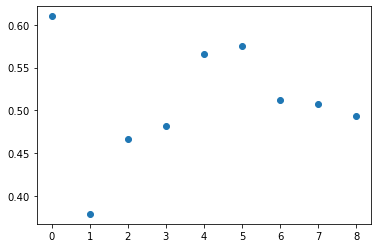

In [102]:
plt.scatter(np.arange(len(lengths)),np.max(-stressArr[0,:,1,50:],axis=1))

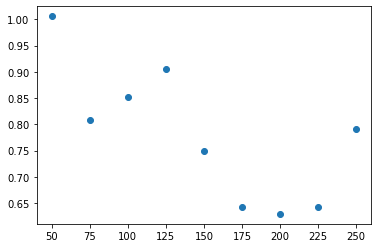

In [104]:
plt.scatter(lengths,np.max(-stressArr[0,:,0,50:],axis=1))

In [50]:
cellNums = []
lenls =[]

for l in  KA_outa:

    tTot= len(getTimeArr(l))
    cellNum = int(getAtomNumber(l))
    lenl =int(l.split('len_')[1].split('_')[0])
    cellNums.append(cellNum)
    lenls.append(lenl)


In [51]:
lenls

[225,
 100,
 175,
 225,
 100,
 175,
 50,
 75,
 250,
 100,
 175,
 50,
 250,
 225,
 125,
 150,
 75,
 150,
 75,
 50,
 200,
 200,
 125,
 200,
 125,
 150,
 250]

In [52]:
np.sort(cellNums)

array([ 2700,  2700,  2700,  4050,  4050,  4050,  5400,  5400,  5400,
        6750,  6750,  6750,  8100,  8100,  8100,  9450,  9450,  9450,
       10800, 10800, 10800, 12150, 12150, 12150, 13500, 13500, 13500])